# ANOVA (ANalysis Of VAriance)

In [1]:
import numpy as np 
from numpy.random import default_rng
rng = default_rng(seed=2540)
from scipy import stats
import matplotlib.pyplot as plt  
import pandas as pd

## ANOVA assumption

- Analysis Of variance (ANOVA) is a collection of statistical models used to compare means for multiple (≥ 3) independent populations. Assume that we have k independent, normally distributed groups with equal variance. 
$$
X_1\sim N(\mu_1,\sigma^2),X_2\sim N(\mu_2,\sigma^2),\cdots,X_k\sim N(\mu_k,\sigma^2)
$$
- We wish to determine if there is a significant difference among the population means of these groups, i.e.
$$
H_0:\mu_1=\mu_2=\cdots=\mu_k. v.s. H_1:\mu_i\neq \mu_j \ for\ some\ i=j.
$$

- The k samples are mutually independent - we use $\chi^2$-test to check the independence
- Each group is a normal random sample - we check this condition with histograms and Q-Q plots.
- The population variance is the same across all k groups - we check this condition by comparing sample standard deviations.

## Checking the Normality Assumptions

First, let us generate some random samples from normal distribution and Poisson distribution. Here, we use histograms to check their normality by intuition.

In [2]:
# Create Poisson sample.
poisson_sample = rng.poisson(lam=9, size=100000)

# Create normal sample. 
normal_sample = rng.normal(loc=9,scale=3, size=100000)

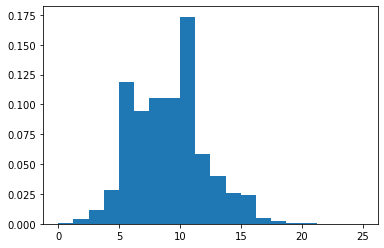

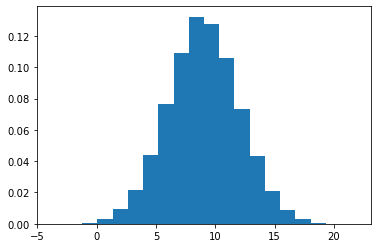

In [3]:
# plot the histogram of Poisson samples
plt.hist(poisson_sample, bins=20, density=True)
plt.show()

# plot the histogram of Normal samples
plt.hist(normal_sample, bins=20, density=True)
plt.show()

- The quantitle-quantile(Q-Q) plot is a graphical technique for determining if two data sets come from populations with a common distribution. A reference line is also plotted. If the two sets come from random samples with the same distribution, the points should fall approximately along this reference line. The greater the departure from this reference line, the greater the evidence for the conclusion that the two data sets have come from different distributions.

Now, we use Q-Q plot to check the normality of samples. It's more accurate to use Q-Q plot, but it still requires our judgement from the graph. Here, we use stats.probplot() to show the Q-Q graph.

((array([-4.34602155, -4.14724578, -4.03913009, ...,  4.03913009,
          4.14724578,  4.34602155]),
  array([ 0,  0,  0, ..., 24, 24, 25])),
 (2.9736419644672436, 9.005720000000002, 0.9921163876253672))

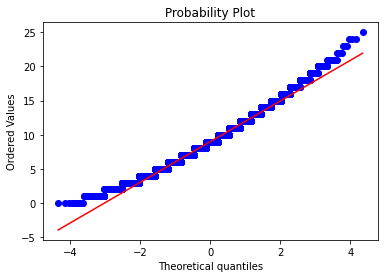

In [4]:
stats.probplot(poisson_sample, dist='norm', plot=plt)

At both ends of the reference line, we can find that the data has a tendency to deviate, and on the whole, the data points are above the reference line. Of course, this is the Poisson sample, so it shouldn't be close to or on the line.

((array([-4.34602155, -4.14724578, -4.03913009, ...,  4.03913009,
          4.14724578,  4.34602155]),
  array([-3.77865275, -3.77474558, -3.59058863, ..., 21.06230802,
         21.35879348, 21.86839642])),
 (2.9950316019765983, 8.997031342693145, 0.9999862152785018))

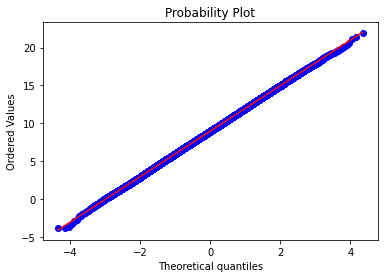

In [5]:
# perhaps it's not obvious without comparison. Now we plot the Q-Q graph of the normal sample we generate before
stats.probplot(normal_sample,dist='norm',plot=plt)

We can see that the data points almost fall on the reference line, which indicates the normality of the sample. 

We can also see the outlier of normality from the graph.

((array([-4.34602594, -4.14725036, -4.03913479, ...,  4.03913479,
          4.14725036,  4.34602594]),
  array([-10.        ,  -3.77865275,  -3.77474558, ...,  21.35879348,
          21.86839642,  25.        ])),
 (2.995956872574462, 8.997001402665092, 0.9999612956406845))

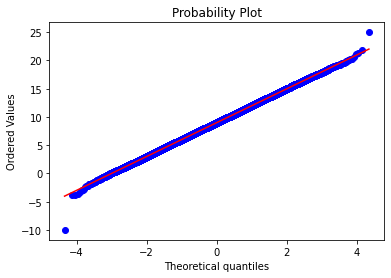

In [6]:
# add outlier points to the random sample
outlier = np.array([-10,25])
normal_sample_outlier = np.concatenate((normal_sample,outlier))

stats.probplot(normal_sample_outlier,dist='norm',plot=plt)

### Outlier Detection

By comparing the minimum estimator and maximum estimator with sample data, this test will detect possible outliers.

- minimum estimator: $Q_1-k(Q_3-Q_1)$
- minimum estimator: $Q_3+k(Q_3-Q_1)$

where $k$ is parameter. 
- $k=1.5$: moderately abnormal
- $k=3$: extremely abnormal

In [7]:
# we use normal_sample_outlier
# compute the quantile of the sample
Q1 = np.percentile(normal_sample_outlier, 25)
Q3 = np.percentile(normal_sample_outlier, 75)

# detect the extreme outlier
k = 3

# compute the critical value of Tukey's test
Tmin = Q1 - k*(Q3-Q1)
Tmax = Q3 + k*(Q3-Q1)
Tmin, Tmax

(-5.081220060994102, 23.08205685105702)

In [8]:
# find the outliers
print(normal_sample_outlier[normal_sample_outlier < Tmin])
print(normal_sample_outlier[normal_sample_outlier > Tmax])

[-10.]
[25.]


## Checking the Homogeneity of Variance (Bartlett's Test)

Recall that we also need to assume equal variance across different samples. 
- To test equal variance for k = 2 populations， we can use two-sample F -test. For $k\geq 3$, Bartlett’s test is used to compare the variance of all groups.

In [9]:
# Create normal samples, of different mean and variance
sample = rng.normal(loc=9,scale=3, size=1000)
sample_different_mean = rng.normal(loc=3,scale=3, size=1000)
sample_different_var = rng.normal(loc=9,scale=3.3, size=1000)

In [10]:
sample.var(ddof=1),sample_different_mean.var(ddof=1),sample_different_var.var(ddof=1)

(9.150470006356922, 8.278119059193862, 11.223226364206674)

- For two samples of all, we use paired F-test to check whether their varience is equal. Here, the null hypothesis is $\sigma^2_1=\sigma_2^2$. For F-test, we can use st.f.cdf(F,df1,df2) to compute the rejction region.

In [11]:
# compute the F statistic and compare it with critical value
F_stat1 = sample.var(ddof=1)/sample_different_mean.var(ddof=1)
stats.f.cdf(F_stat1, 999, 999)

0.9432454229985515

Generally speaking, the p-value is greater than the commonest significance level $\alpha$ (0.05 or 0,1) so we fail to reject the null hypothesis.

In [12]:
F_stat2 = sample.var(ddof=1)/sample_different_var.var(ddof=1)
stats.f.cdf(F_stat2, 999, 999) 

0.0006339338451573497

For more than two samples, it is a smarter way to use stats.bartlett(sample1,sample2,sample3,...) to get the test statistic and the p-value.

In [13]:
stats.bartlett(sample, sample_different_mean, sample_different_var)

BartlettResult(statistic=24.37187079530944, pvalue=5.101706850512023e-06)

At significane level $\alpha=0.05$, we should reject the null hypothesis.

## One-Way ANOVA

Assume we have check the assumption of ANOVA and samples satisfy your requirement. Now, let's conduct the one-way ANOVA of samples. Here, we use the data in the slides to get the result of ANOVA.

In [14]:
# data samples of the example in slides
A = np.array([3,4,2,1])
B = np.array([2,1,0,9])
C = np.array([1,2,1,2])
D = np.array([6,9,7,10])

data = pd.DataFrame({"A":A,"B":B,"C":C,"D":D})
data

,A,B,C,D
0,3,2,1,6
1,4,1,2,9
2,2,0,1,7
3,1,9,2,10


In [15]:
data.var()

A     1.666667
B    16.666667
C     0.333333
D     3.333333
dtype: float64

Recall that for ANOVA, we need to test their population mean. If $H_0:\mu_A=\mu_B=\mu_C=\mu_D$ is true, variation in the data should be approximately equal to the variation within each group.

In [16]:
#compute the sample mean
sample_mean = data.sum().sum()/data.count().sum()
print("The sample mean is:", sample_mean)

# measure of variation across the entire data set
SST = ((data.values - sample_mean)**2).sum()
print("SST:",SST)

#measure of variation between different groups
SSB = ((data.mean() - sample_mean)**2 * data.count()).sum()
print("SSB:",SSB)

# measure of variation attributed to the random fluctuation among subjects within a group
SSW = (data.var() * (data.count()-1)).sum()
print("SSW:",SSW)

The sample mean is: 3.75
SST: 167.0
SSB: 101.0
SSW: 66.0


Note: we can check SST=SSB+SSW 

In [17]:
k = 4  # groups
N = 16  # total number of samples

#compute the F statistic
F_stat = (SSB/(k-1))/(SSW/(N-k))  # MSB/MSW
F_stat

6.121212121212121

In [18]:
pvalue = stats.f.sf(F_stat,k-1,N-k)
pvalue

0.009080667551767405

Note: reject the $H_0$ if $\alpha>$ pvalue. Also, you can use st.f_oneway(group1,group2,...,groupk) to directly get the ANOVA result. 

In [19]:
stats.f_oneway(A, B, C, D)

F_onewayResult(statistic=6.121212121212121, pvalue=0.009080667551767405)

# Multiple comparison using Tukey's Honest Significant Difference (HSD) test

After performing ANOVA and rejecting the null hypothesis, we can proceed to post hoc analysis of the data to dectect the pairs that have significantly different means.

## Recap of the Bonferroni adjustment
In class, we have seen one method for this: the Bonferroni adjustment. The idea behind this method is based on the Bonferroni inequality
$P(\cup_i A_i) \le \sum_i P(A_i)$. To see this, recall first that the Bonferroni adjustment is used to adjust the type-I error rate $\alpha^* = \frac{\alpha}{\binom{k}{2}}$ in the pair-wise comparisons so that the overall probability of having type-I error in at least one pair is at most that used in the ANOVA test.  Consider the following hypothesis 

$H_0: \mu_1 = \dots = \mu_k$ vs $H_1: \mu_i \neq \mu_j$ for some $i \neq j$

The null hypothesis can be decomposed into

$H_{0,ij}: \mu_i = \mu_j, \hbox{ for all pairs }i,j.$

Hence, making a type-I error in $H_0$ is equivalent to making a type-I error in $H_{0,ij}$ at least one pair.  By the Bonferroni inequality, we have

$P(\hbox{Type-I error in }H_0) = P(\cup_{ij}\hbox{Type-I error in }H_{0,ij}) \le \sum_{ij}P(\hbox{Type-I error in }H_{0,ij}) = \alpha^* \times \binom{k}{2} = \alpha.$

By using the Bonferroni adjustment, we are guaranteed to make at most $\alpha$ type-I error in $H_0$. However, the drawback of the this adjustment is that it can be very conservative in the sense that it is reluctant to reject $H_{0,ij}$ even if it is not true, which means high probability of a *Type-II error*.  

## The Tukey's HSD test

The Tukey's HSD test is shown to have smaller Type-II error rate $\beta$ in compare with the Bonferrni adjustment. 

The test not only tell you the pairs that are significantly different in mean, but also produce *a confidence interval of the difference in mean* for each pair of populations.
**We emphasize that Tukey's HSD usually only applies to the case were the sample size of each population is the same.**

The math behind this test is beyond the scope of this course.

We now demonstrate how Tukey's HSD test is carried out in Scipy Stats.
(To use stats.tukey_hsd(), ensure Python >= 3.8.0 and Scipy >= 1.8.0.
 Run `conda install scipy=1.8.0`

In [20]:
pop0 = rng.normal(0, 1, 50)
pop1 = rng.normal(0.1, 1, 50)
pop2 = rng.normal(1, 1, 50)

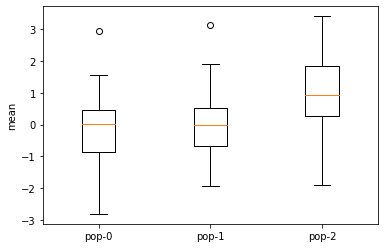

In [21]:
fig, ax = plt.subplots(1, 1)
ax.boxplot([pop0, pop1, pop2])
ax.set_xticklabels(["pop-0", "pop-1", "pop-2"]) 
ax.set_ylabel("mean") 
plt.show()

In [22]:
res = stats.tukey_hsd(pop0, pop1, pop2)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.133     0.794    -0.620     0.354
 (0 - 2)     -1.156     0.000    -1.643    -0.670
 (1 - 0)      0.133     0.794    -0.354     0.620
 (1 - 2)     -1.023     0.000    -1.510    -0.536
 (2 - 0)      1.156     0.000     0.670     1.643
 (2 - 1)      1.023     0.000     0.536     1.510

